# API ACESSO IPCA BANCO CENTRAL: <h1>

O exercício a ser desenvolvido para a presente unidade consiste em conectar-se a uma API. O Banco Central do Brasil disponibiliza dados a respeito de diversos indicadores econômicos do país. Sua tarefa será encontrar a série histórica relativa à inflação (IPCA) na plataforma de dados abertos do BC, importá-la e transformá-la em um DataFrame do Pandas.


### API do Banco Central: 
<https://dadosabertos.bcb.gov.br/dataset?res_format=API>

#### Endereço padrão de acesso API:

https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}

**Parâmetros:**

**codigo_Serie** (obrigatório): parâmetro numérico que representa o código da série a ser consultada.

**dataInicial** (opcional): parâmetro textual que representa a data de início da consulta, no formato dd/MM/aaaa.

**dataFinal** (opcional): parâmetro textual que representa a data final da consulta, no formato dd/MM/aaaa.

O serviço permite também recuperar os N últimos valores de uma determinada série:
        <https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados/ultimos/{N}?formato=json>


### Sistema Gerenciador de Séries Temporais do Bacen (SGS)

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries


Para série IPCA código da sérire: 433 ( Índice nacional de preços ao consumidor-amplo (IPCA) )

### Instalando Bibliotecas:

In [ ]:
!pip install pandas
!pip install requests



### Importando Bibliotecas:

In [27]:

import pandas as pd
import requests
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


### Parâmetros de Entrada:

In [28]:
# Parâmetros de entrada:

codigo_serie = 433 # Código da série do IPCA
link = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json" # Link de conexão da API


### Coletando Dados:

In [29]:
#Testando requisição:

status_api = requests.get(link).status_code 

if status_api == 200:
    print("Conexão bem sucedida")
else:
    print(f"Conexão não realizada. Erro: {status_api}")


Conexão bem sucedida


In [30]:
#Armazenando JSON da requisição:
dados = requests.get(link).json()

#Imprimindo JSON armazenado
pprint.pprint(dados)

[{'data': '01/01/1980', 'valor': '6.62'},
 {'data': '01/02/1980', 'valor': '4.62'},
 {'data': '01/03/1980', 'valor': '6.04'},
 {'data': '01/04/1980', 'valor': '5.29'},
 {'data': '01/05/1980', 'valor': '5.70'},
 {'data': '01/06/1980', 'valor': '5.31'},
 {'data': '01/07/1980', 'valor': '5.55'},
 {'data': '01/08/1980', 'valor': '4.95'},
 {'data': '01/09/1980', 'valor': '4.23'},
 {'data': '01/10/1980', 'valor': '9.48'},
 {'data': '01/11/1980', 'valor': '6.67'},
 {'data': '01/12/1980', 'valor': '6.61'},
 {'data': '01/01/1981', 'valor': '6.84'},
 {'data': '01/02/1981', 'valor': '6.40'},
 {'data': '01/03/1981', 'valor': '4.97'},
 {'data': '01/04/1981', 'valor': '6.46'},
 {'data': '01/05/1981', 'valor': '5.56'},
 {'data': '01/06/1981', 'valor': '5.52'},
 {'data': '01/07/1981', 'valor': '6.26'},
 {'data': '01/08/1981', 'valor': '5.50'},
 {'data': '01/09/1981', 'valor': '5.26'},
 {'data': '01/10/1981', 'valor': '5.08'},
 {'data': '01/11/1981', 'valor': '5.27'},
 {'data': '01/12/1981', 'valor': '

### DataFrame

In [31]:
# Criando Data Frame com Pandas
df_ipca = pd.DataFrame(dados)

# Visualizandos primeiras linhas dataframe
df_ipca.head(13)

,data,valor
0,01/01/1980,6.62
1,01/02/1980,4.62
2,01/03/1980,6.04
3,01/04/1980,5.29
4,01/05/1980,5.70
5,01/06/1980,5.31
6,01/07/1980,5.55
7,01/08/1980,4.95
8,01/09/1980,4.23
9,01/10/1980,9.48


In [32]:
# Verificando tipos de dados armazenados

df_ipca.dtypes

data     object
valor    object
dtype: object

In [38]:

df_ipca.head()

,data,valor
0,1980-01-01,6.62
1,1980-02-01,4.62
2,1980-03-01,6.04
3,1980-04-01,5.29
4,1980-05-01,5.70


In [40]:
# Conversão dos dados de objetos para Datetime e Float
df_ipca['data'] = pd.to_datetime(df_ipca.data, dayfirst=True)
df_ipca['valor'] = df_ipca.valor.astype(float)

In [41]:
# Verificando conversão de tipos
#df_ipca.dtypes


df_ipca.info()
df_ipca.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    517 non-null    datetime64[ns]
 1   valor   517 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB


(517, 2)

In [42]:
df_ipca.head(125)

,data,valor
0,1980-01-01,6.62
1,1980-02-01,4.62
2,1980-03-01,6.04
3,1980-04-01,5.29
4,1980-05-01,5.70
...,...,...
120,1990-01-01,67.55
121,1990-02-01,75.73
122,1990-03-01,82.39
123,1990-04-01,15.52


### Plotando Gráficos

Observando variação dos últimos 12 meses, 5 anos , 10 anos , 15 anos e global

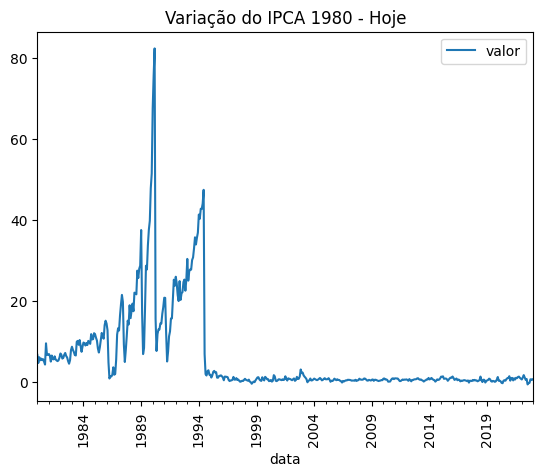

In [43]:
df_ipca.plot.line(y = 'valor', x = 'data', rot=90, title = 'Variação do IPCA 1980 - Hoje');



In [44]:
df_ipca_22 = df_ipca[df_ipca.data >= "01/01/2022"]




In [45]:
df_ipca_22.head(24)

,data,valor
504,2022-01-01,0.54
505,2022-02-01,1.01
506,2022-03-01,1.62
507,2022-04-01,1.06
508,2022-05-01,0.47
509,2022-06-01,0.67
510,2022-07-01,-0.68
511,2022-08-01,-0.36
512,2022-09-01,-0.29
513,2022-10-01,0.59


In [46]:
df_ipca_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 504 to 516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    13 non-null     datetime64[ns]
 1   valor   13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 312.0 bytes


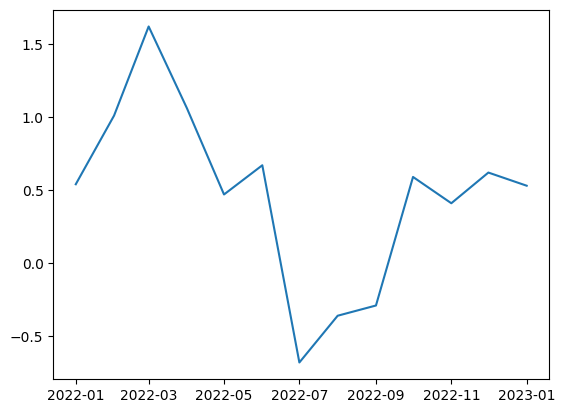

In [47]:
#df2.plot.line(y = 'valor', x = 'data', rot=90, title = 'Variação do IPCA 1980 - Hoje')
plt.plot(df_ipca_22.data,df_ipca_22.valor)

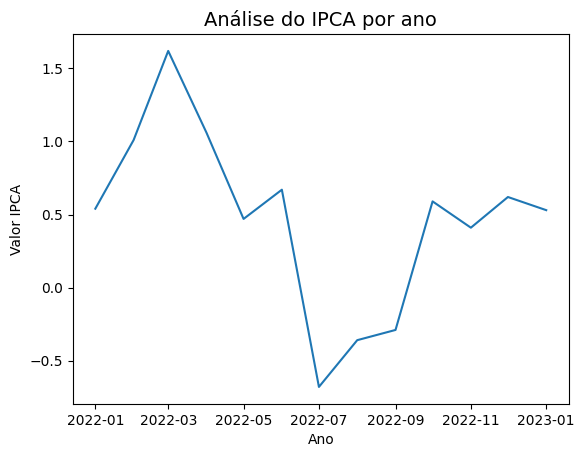

In [48]:
grafico = sns.lineplot(x="data", y="valor", data=df_ipca_22)
plt.xlabel( "Ano") 
plt.ylabel( "Valor IPCA") 
plt.title( "Análise do IPCA por ano" , size = 14 ) 
plt.show()

### Exportando arquivos

In [ ]:
# Definindo caminho de base para exportação
caminho_base = './Outputs/{name_file}'

# Definindo nome padrão de arquivos para exportação Ex. 'NOME-YYYY-MM-DD.csv'
name_file = 'IPCA-' + str(df_ipca.data.dt.date.max()) + '.csv'

# Exportando arquivo CSV
df_ipca.to_csv(caminho_base.format(name_file=name_file), sep=',', decimal='.' )

In [ ]:
# Definindo caminho de base para exportação
caminho_base = './Outputs/{name_file}'

# Definindo nome padrão de arquivos para exportação Ex. 'NOME-YYYY-MM-DD.csv'
name_file = 'IPCA-' + str(df_ipca_22.data.dt.date.max()) + '.csv'

# Exportando arquivo CSV
df_ipca_22.to_csv(caminho_base.format(name_file=name_file), sep=',', decimal='.' )